In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Loading the data
customers_df = pd.read_csv('dataset/Customers.csv')
products_df = pd.read_csv('dataset/Products.csv')
transactions_df = pd.read_csv('dataset/Transactions.csv')

In [3]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [4]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.2+ KB


In [5]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


In [6]:
customers_df.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [7]:
products_df.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [8]:
transactions_df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [9]:
grouped_transactions = transactions_df.groupby('CustomerID')

In [10]:
# find the total spent by each customer
amount_spent_by_each_customer = grouped_transactions['TotalValue'].sum()

amount_spent_by_each_customer

CustomerID
C0001    3354.52
C0002    1862.74
C0003    2725.38
C0004    5354.88
C0005    2034.24
          ...   
C0196    4982.88
C0197    1928.65
C0198     931.83
C0199    1979.28
C0200    4758.60
Name: TotalValue, Length: 199, dtype: float64

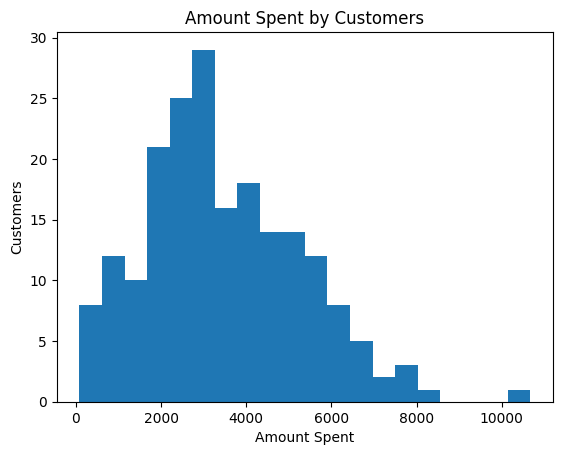

In [11]:
# Plot the amount spent by each customer on a frequency graph
plt.hist(amount_spent_by_each_customer, bins=20)
plt.xlabel('Amount Spent')
plt.ylabel('Customers')
plt.title('Amount Spent by Customers')
plt.show()

In [12]:
amount_spent_by_each_customer.describe()

count      199.000000
mean      3467.314372
std       1832.677958
min         82.360000
25%       2162.040000
50%       3137.660000
75%       4770.225000
max      10673.870000
Name: TotalValue, dtype: float64

In [13]:
# Check which product has sold the most
grouped_products = transactions_df.groupby('ProductID')
product_sold = grouped_products['Quantity'].sum()
product_sold

ProductID
P001    18
P002    25
P003    31
P004    18
P005    24
        ..
P096    34
P097    25
P098    16
P099    11
P100    15
Name: Quantity, Length: 100, dtype: int64

In [14]:
# associate the product id with the product name
product_sold = product_sold.reset_index()
product_sold = product_sold.merge(products_df, on='ProductID')
product_sold

,ProductID,Quantity,ProductName,Category,Price
0,P001,18,ActiveWear Biography,Books,169.30
1,P002,25,ActiveWear Smartwatch,Electronics,346.30
2,P003,31,ComfortLiving Biography,Books,44.12
3,P004,18,BookWorld Rug,Home Decor,95.69
4,P005,24,TechPro T-Shirt,Clothing,429.31
...,...,...,...,...,...
95,P096,34,SoundWave Headphones,Electronics,307.47
96,P097,25,BookWorld Cookbook,Books,319.34
97,P098,16,SoundWave Laptop,Electronics,299.93
98,P099,11,SoundWave Mystery Book,Books,354.29


In [15]:
# What are the top 5 products sold
top_5_products = product_sold.sort_values('Quantity', ascending=False).head(5)
top_5_products

,ProductID,Quantity,ProductName,Category,Price
53,P054,46,SoundWave Cookbook,Books,57.30
58,P059,46,SoundWave Jeans,Clothing,303.20
28,P029,45,TechPro Headphones,Electronics,433.64
47,P048,43,TechPro Cookbook,Books,416.40
56,P057,43,ActiveWear Smartphone,Electronics,239.70


In [16]:
# Check which products generate the most value
product_sold['TotalValue'] = product_sold['Quantity'] * product_sold['Price']

# What are the top 5 products that generate the most value
top_5_products_value = product_sold.sort_values('TotalValue', ascending=False).head(5)
top_5_products_value

,ProductID,Quantity,ProductName,Category,Price,TotalValue
28,P029,45,TechPro Headphones,Electronics,433.64,19513.80
78,P079,43,ActiveWear Rug,Home Decor,417.37,17946.91
47,P048,43,TechPro Cookbook,Books,416.40,17905.20
19,P020,38,ActiveWear Jacket,Clothing,396.34,15060.92
61,P062,39,HomeSense Novel,Books,374.16,14592.24


In [17]:
# check which region has the most customers
grouped_customers = customers_df.groupby('Region')
customers_per_region = grouped_customers['CustomerID'].count()
customers_per_region

Region
Asia             45
Europe           50
North America    46
South America    59
Name: CustomerID, dtype: int64

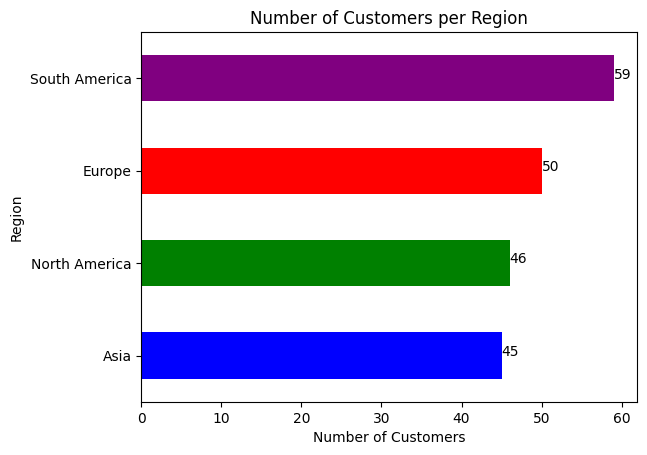

In [18]:
customers_per_region = customers_per_region.sort_values()
customers_per_region.plot(kind='barh', color=['blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel('Number of Customers')
plt.ylabel('Region')
plt.title('Number of Customers per Region')
for index, value in enumerate(customers_per_region):
    plt.text(value, index, str(value))
plt.show()

In [19]:
customers_df_copy = customers_df.merge(transactions_df, on='CustomerID')
grouped_customers = customers_df_copy.groupby('Region')
value_per_region = grouped_customers['TotalValue'].sum()
value_per_region

Region
Asia             152074.97
Europe           166254.63
North America    152313.40
South America    219352.56
Name: TotalValue, dtype: float64

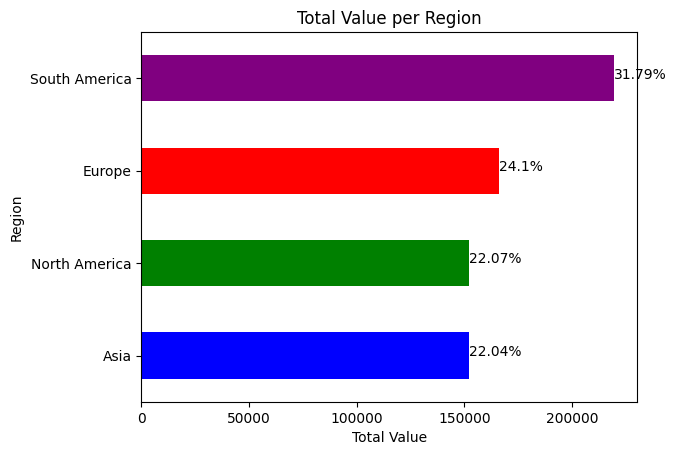

In [ ]:
# plot the total value generated by each region
value_per_region = value_per_region.sort_values()
value_per_region.plot(kind='barh', color=['blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel('Total Value')
plt.ylabel('Region')
plt.title('Total Value per Region')
total_value = value_per_region.sum()
for index, value in enumerate(value_per_region):
    plt.text(value, index, str(round(value / total_value * 100, 2)) + '%')
plt.show()

C:\Users\ojass\AppData\Local\Temp\ipykernel_31732\1663342569.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  transactions_df_copy['TotalValue'].resample('M').sum().plot()


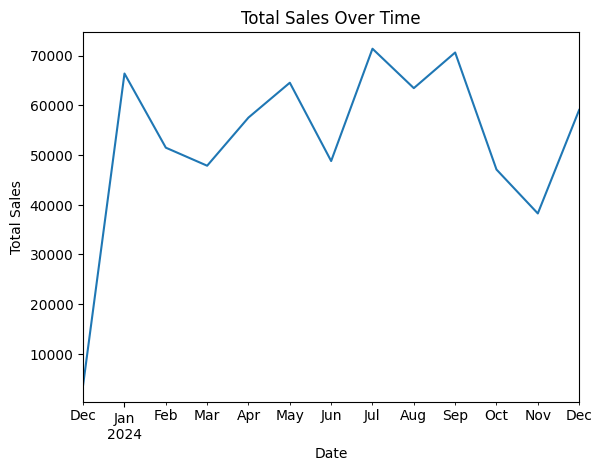

In [21]:
transactions_df_copy = transactions_df.copy()
transactions_df_copy['TransactionDate'] = pd.to_datetime(transactions_df_copy['TransactionDate'])
transactions_df_copy.set_index('TransactionDate', inplace=True)
transactions_df_copy['TotalValue'].resample('M').sum().plot()
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Total Sales Over Time')
plt.show()

C:\Users\ojass\AppData\Local\Temp\ipykernel_31732\3680700978.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  transactions_df_copy['TransactionID'].resample('M').count().plot()


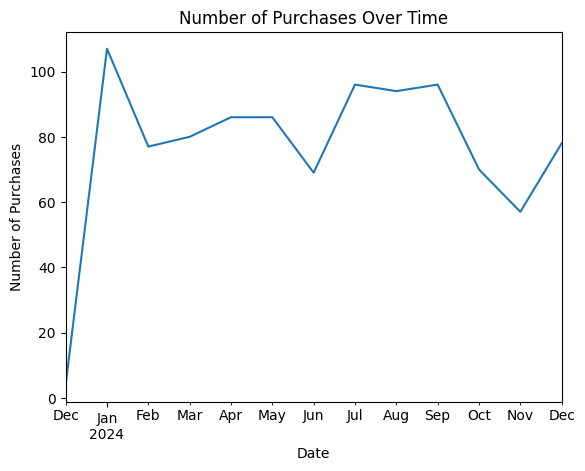

In [22]:
# Plot the number of purchases over time
transactions_df_copy['TransactionID'].resample('M').count().plot()
plt.xlabel('Date')
plt.ylabel('Number of Purchases')
plt.title('Number of Purchases Over Time')
plt.show()


C:\Users\ojass\AppData\Local\Temp\ipykernel_31732\2144009546.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data['TotalValue'].resample('M').sum().plot(label=region)
C:\Users\ojass\AppData\Local\Temp\ipykernel_31732\2144009546.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data['TotalValue'].resample('M').sum().plot(label=region)
C:\Users\ojass\AppData\Local\Temp\ipykernel_31732\2144009546.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data['TotalValue'].resample('M').sum().plot(label=region)
C:\Users\ojass\AppData\Local\Temp\ipykernel_31732\2144009546.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data['TotalValue'].resample('M').sum().plot(label=region)


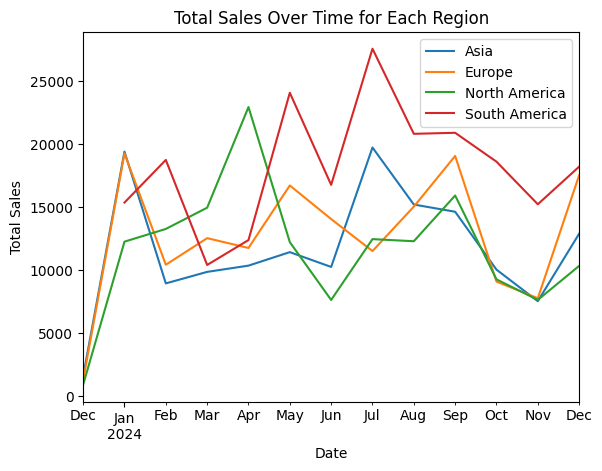

In [23]:
transactions_df_copy = transactions_df.copy()
transactions_df_copy = transactions_df_copy.merge(customers_df, on='CustomerID')
transactions_df_copy['TransactionDate'] = pd.to_datetime(transactions_df_copy['TransactionDate'])
transactions_df_copy.set_index('TransactionDate', inplace=True)
grouped_region = transactions_df_copy.groupby('Region')
for region, data in grouped_region:
    data['TotalValue'].resample('M').sum().plot(label=region)
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Total Sales Over Time for Each Region')
plt.legend()
plt.show()

In [24]:
# check the most popular products in South America by quantity sold
south_america_customers = customers_df[customers_df['Region'] == 'South America']
south_america_customers = south_america_customers.merge(transactions_df, on='CustomerID')
south_america_customers = south_america_customers.merge(products_df, on='ProductID')
grouped_products = south_america_customers.groupby('ProductID')
product_sold = grouped_products['Quantity'].sum()
product_sold = product_sold.reset_index()
product_sold = product_sold.merge(products_df, on='ProductID')
top_5_products = product_sold.sort_values('Quantity', ascending=False).head(5)
top_5_products

,ProductID,Quantity,ProductName,Category,Price
27,P029,22,TechPro Headphones,Electronics,433.64
50,P054,21,SoundWave Cookbook,Books,57.30
54,P058,21,ActiveWear Textbook,Books,157.62
36,P040,20,SoundWave Mystery Book,Books,153.19
44,P048,18,TechPro Cookbook,Books,416.40


In [25]:
# check the most popular products in South America by value sold
product_sold['TotalValue'] = product_sold['Quantity'] * product_sold['Price']
top_5_products_value = product_sold.sort_values('TotalValue', ascending=False).head(5)
top_5_products_value

,ProductID,Quantity,ProductName,Category,Price,TotalValue
27,P029,22,TechPro Headphones,Electronics,433.64,9540.08
15,P017,17,ActiveWear Textbook,Books,469.77,7986.09
75,P079,18,ActiveWear Rug,Home Decor,417.37,7512.66
44,P048,18,TechPro Cookbook,Books,416.40,7495.20
35,P039,17,TechPro Smartwatch,Electronics,430.59,7320.03


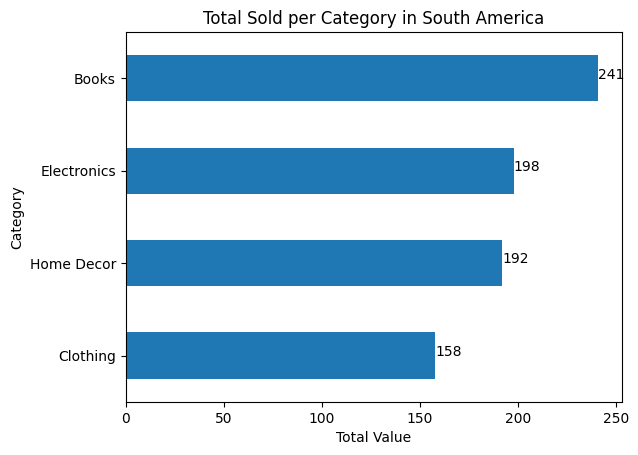

In [26]:
# check which category is most sold in south america
grouped_category = product_sold.groupby('Category')
category_value = grouped_category['Quantity'].sum()
category_value = category_value.sort_values()
category_value.plot(kind='barh')
plt.xlabel('Total Value')
plt.ylabel('Category')
plt.title('Total Sold per Category in South America')
for index, value in enumerate(category_value):
    plt.text(value, index, str(value))
plt.show()

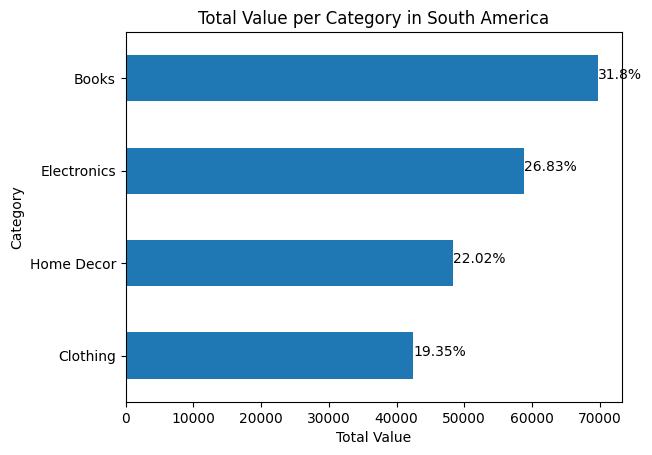

In [ ]:
grouped_category = product_sold.groupby('Category')
category_value = grouped_category['TotalValue'].sum()
category_value = category_value.sort_values()
category_value.plot(kind='barh')
plt.xlabel('Total Value')
plt.ylabel('Category')
plt.title('Total Value per Category in South America')
total_value = category_value.sum()
for index, value in enumerate(category_value):
    plt.text(value, index, str(round(value / total_value * 100, 2)) + '%')
plt.show()

In [28]:
# check the most popular products in Asia by quantity sold
asia_customers = customers_df[customers_df['Region'] == 'Asia']
asia_customers = asia_customers.merge(transactions_df, on='CustomerID')
asia_customers = asia_customers.merge(products_df, on='ProductID')
grouped_products = asia_customers.groupby('ProductID')
product_sold = grouped_products['Quantity'].sum()
product_sold = product_sold.reset_index()
product_sold = product_sold.merge(products_df, on='ProductID')
top_5_products = product_sold.sort_values('Quantity', ascending=False).head(5)
top_5_products

,ProductID,Quantity,ProductName,Category,Price
41,P047,16,ComfortLiving Cookware Set,Home Decor,159.33
68,P076,14,ActiveWear Jeans,Clothing,429.29
24,P028,13,HomeSense Desk Lamp,Home Decor,235.58
56,P064,13,HomeSense Running Shoes,Clothing,452.42
35,P040,12,SoundWave Mystery Book,Books,153.19


In [29]:
# check the most popular products in Asia by value sold
product_sold['TotalValue'] = product_sold['Quantity'] * product_sold['Price']
top_5_products_value = product_sold.sort_values('TotalValue', ascending=False).head(5)
top_5_products_value

,ProductID,Quantity,ProductName,Category,Price,TotalValue
68,P076,14,ActiveWear Jeans,Clothing,429.29,6010.06
56,P064,13,HomeSense Running Shoes,Clothing,452.42,5881.46
57,P065,11,BookWorld Sweater,Clothing,427.61,4703.71
44,P050,10,ActiveWear Smartwatch,Electronics,437.65,4376.50
70,P079,10,ActiveWear Rug,Home Decor,417.37,4173.70


In [30]:
# check the most popular products in Europe by quantity sold
europe_customers = customers_df[customers_df['Region'] == 'Europe']
europe_customers = europe_customers.merge(transactions_df, on='CustomerID')
europe_customers = europe_customers.merge(products_df, on='ProductID')
grouped_products = europe_customers.groupby('ProductID')
product_sold = grouped_products['Quantity'].sum()
product_sold = product_sold.reset_index()
product_sold = product_sold.merge(products_df, on='ProductID')
top_5_products = product_sold.sort_values('Quantity', ascending=False).head(5)
top_5_products

,ProductID,Quantity,ProductName,Category,Price
44,P049,19,TechPro Textbook,Books,147.95
4,P006,17,ActiveWear Rug,Home Decor,121.32
83,P097,17,BookWorld Cookbook,Books,319.34
62,P074,15,SoundWave Desk Lamp,Home Decor,295.58
47,P054,15,SoundWave Cookbook,Books,57.30


In [31]:
# check the most popular products in Europe by value sold
product_sold['TotalValue'] = product_sold['Quantity'] * product_sold['Price']
top_5_products_value = product_sold.sort_values('TotalValue', ascending=False).head(5)
top_5_products_value

,ProductID,Quantity,ProductName,Category,Price,TotalValue
70,P083,13,ActiveWear Smartwatch,Electronics,455.72,5924.36
83,P097,17,BookWorld Cookbook,Books,319.34,5428.78
66,P079,13,ActiveWear Rug,Home Decor,417.37,5425.81
78,P092,13,BookWorld Running Shoes,Clothing,389.20,5059.60
40,P045,10,SoundWave T-Shirt,Clothing,481.78,4817.80


In [32]:
# check the most popular products in North America by quantity sold
north_america_customers = customers_df[customers_df['Region'] == 'North America']
north_america_customers = north_america_customers.merge(transactions_df, on='CustomerID')
north_america_customers = north_america_customers.merge(products_df, on='ProductID')
grouped_products = north_america_customers.groupby('ProductID')
product_sold = grouped_products['Quantity'].sum()
product_sold = product_sold.reset_index()
product_sold = product_sold.merge(products_df, on='ProductID')
top_5_products = product_sold.sort_values('Quantity', ascending=False).head(5)
top_5_products

,ProductID,Quantity,ProductName,Category,Price
24,P027,18,SoundWave Headphones,Electronics,229.06
18,P019,17,ComfortLiving Sweater,Clothing,385.37
21,P022,14,HomeSense Wall Art,Home Decor,137.54
46,P051,12,ComfortLiving Desk Lamp,Home Decor,65.16
50,P055,12,BookWorld Biography,Books,128.53


In [33]:
# check the most popular products in North America by value sold
product_sold['TotalValue'] = product_sold['Quantity'] * product_sold['Price']
top_5_products_value = product_sold.sort_values('TotalValue', ascending=False).head(5)
top_5_products_value

,ProductID,Quantity,ProductName,Category,Price,TotalValue
18,P019,17,ComfortLiving Sweater,Clothing,385.37,6551.29
77,P083,12,ActiveWear Smartwatch,Electronics,455.72,5468.64
34,P037,10,SoundWave Smartwatch,Electronics,459.86,4598.60
43,P048,11,TechPro Cookbook,Books,416.40,4580.40
26,P029,10,TechPro Headphones,Electronics,433.64,4336.40


In [35]:
# Get the top 20% of customers that generate the most value
grouped_customers = transactions_df.groupby('CustomerID')
amount_spent_by_each_customer = grouped_customers['TotalValue'].sum()
amount_spent_by_each_customer = amount_spent_by_each_customer.reset_index()
amount_spent_by_each_customer = amount_spent_by_each_customer.sort_values('TotalValue', ascending=False)
top_20_percent = amount_spent_by_each_customer.head(int(0.2 * len(amount_spent_by_each_customer)))

In [36]:
# Check how much percentage of the total value is generated by the top 20% of customers (We're checking the 80/20 rule)
total_value = amount_spent_by_each_customer['TotalValue'].sum()
top_20_percent_value = top_20_percent['TotalValue'].sum()
percentage = top_20_percent_value / total_value * 100
percentage

np.float64(35.14466817728508)

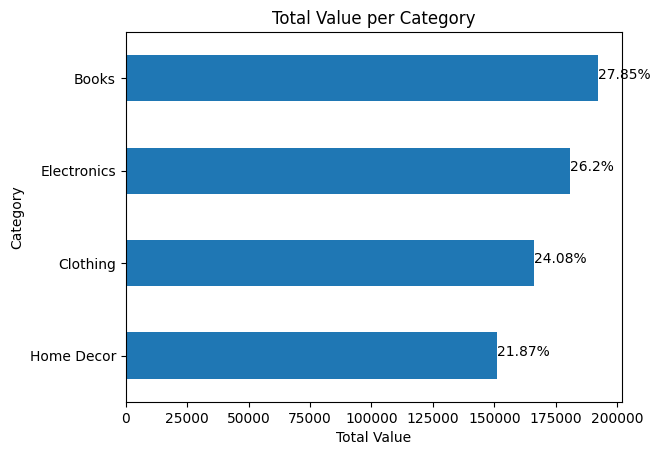

In [37]:
# find the contribution of each category to the total value
transactions_df_copy = transactions_df.copy()
transactions_df_copy = transactions_df_copy.merge(products_df, on='ProductID')
grouped_category = transactions_df_copy.groupby('Category')
category_value = grouped_category['TotalValue'].sum()
category_value = category_value.sort_values()
category_value.plot(kind='barh')
plt.xlabel('Total Value')
plt.ylabel('Category')
plt.title('Total Value per Category')
total_value = category_value.sum()
for index, value in enumerate(category_value):
    plt.text(value, index, str(round(value / total_value * 100, 2)) + '%')
plt.show()

In [38]:
# find the most popular products
grouped_products = transactions_df_copy.groupby('ProductID')
product_sold = grouped_products['Quantity'].sum()
product_sold = product_sold.reset_index()
product_sold = product_sold.merge(products_df, on='ProductID')
top_5_products = product_sold.sort_values('Quantity', ascending=False).head(5)
top_5_products

,ProductID,Quantity,ProductName,Category,Price
53,P054,46,SoundWave Cookbook,Books,57.30
58,P059,46,SoundWave Jeans,Clothing,303.20
28,P029,45,TechPro Headphones,Electronics,433.64
47,P048,43,TechPro Cookbook,Books,416.40
56,P057,43,ActiveWear Smartphone,Electronics,239.70


In [39]:
# find the products that generate the most value
product_sold['TotalValue'] = product_sold['Quantity'] * product_sold['Price']
top_5_products_value = product_sold.sort_values('TotalValue', ascending=False).head(5)
top_5_products_value

,ProductID,Quantity,ProductName,Category,Price,TotalValue
28,P029,45,TechPro Headphones,Electronics,433.64,19513.80
78,P079,43,ActiveWear Rug,Home Decor,417.37,17946.91
47,P048,43,TechPro Cookbook,Books,416.40,17905.20
19,P020,38,ActiveWear Jacket,Clothing,396.34,15060.92
61,P062,39,HomeSense Novel,Books,374.16,14592.24


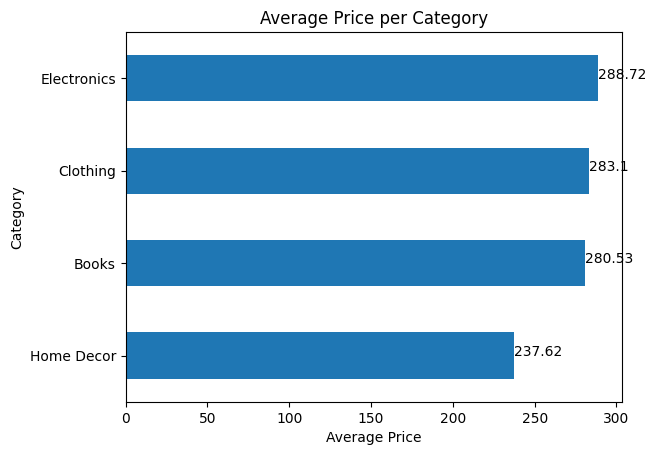

In [52]:
# find the average price in each category by merging the transactions and products dataframes
transactions_df_copy = transactions_df.copy()
transactions_df_copy = transactions_df_copy.merge(products_df, on='ProductID')
transactions_df_copy.drop('Price_y', axis=1, inplace=True)
transactions_df_copy.rename(columns={'Price_x': 'Price'}, inplace=True)
grouped_category = transactions_df_copy.groupby('Category')
average_price = grouped_category['Price'].mean()
average_price = average_price.sort_values()
average_price.plot(kind='barh')
plt.xlabel('Average Price')
plt.ylabel('Category')
plt.title('Average Price per Category')
for index, value in enumerate(average_price):
    plt.text(value, index, str(round(value, 2)))
plt.show()

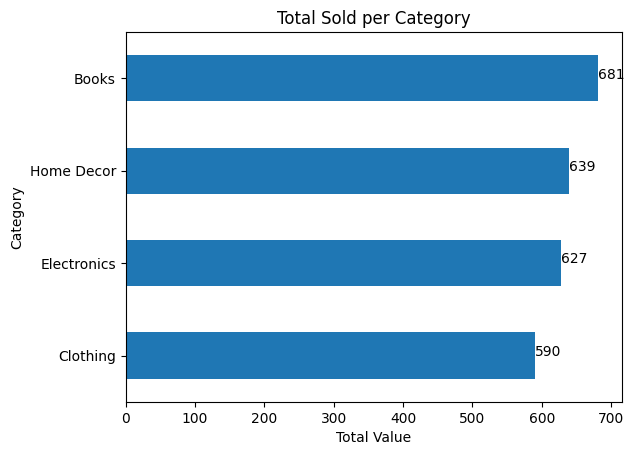

In [53]:
# find total sold per category
category_value = grouped_category['Quantity'].sum()
category_value = category_value.sort_values()
category_value.plot(kind='barh')
plt.xlabel('Total Value')
plt.ylabel('Category')
plt.title('Total Sold per Category')
for index, value in enumerate(category_value):
    plt.text(value, index, str(value))
plt.show()

In [61]:
# find the average time between a customer's signup date and their first purchase
transactions_df_copy = transactions_df.copy()
transactions_df_copy = transactions_df_copy.merge(customers_df, on='CustomerID')
transactions_df_copy['TransactionDate'] = pd.to_datetime(transactions_df_copy['TransactionDate'])
transactions_df_copy['SignupDate'] = pd.to_datetime(transactions_df_copy['SignupDate'])
transactions_df_copy['TimeToPurchase'] = transactions_df_copy['TransactionDate'] - transactions_df_copy['SignupDate']

# find the earliest time to purchase for each customer
grouped_customers = transactions_df_copy.groupby('CustomerID')
earliest_purchase = grouped_customers['TimeToPurchase'].min()
earliest_purchase = earliest_purchase.reset_index()
earliest_purchase['TimeToPurchase'] = earliest_purchase['TimeToPurchase'].dt.days

# remove all negative values
earliest_purchase_copy = earliest_purchase[earliest_purchase['TimeToPurchase'] >= 0]
earliest_purchase_copy['TimeToPurchase'].mean()

np.float64(403.02919708029196)

In [63]:
earliest_purchase_negative = earliest_purchase[earliest_purchase['TimeToPurchase'] < 0]
earliest_purchase_negative['TimeToPurchase'].mean()

np.int64(62)

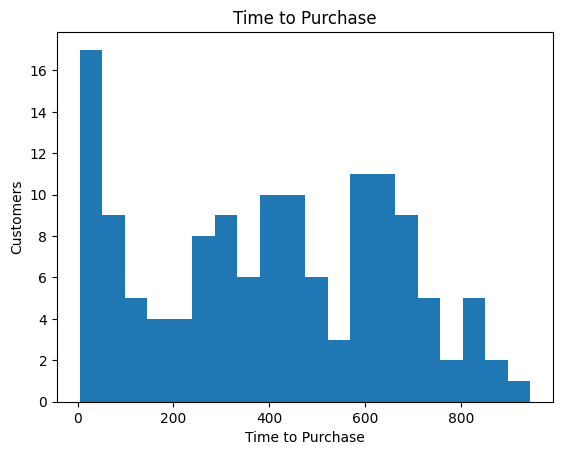

In [66]:
# Plot the distribution of the time to purchase
plt.hist(earliest_purchase_copy['TimeToPurchase'], bins=20)
plt.xlabel('Time to Purchase')
plt.ylabel('Customers')
plt.title('Time to Purchase')
plt.show()